In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
purchase_price = 272200
down = 0.05
loan = purchase_price * (1 - down)

dfs = {}

### Scenario 1: 30-year fixed

Total Paid: $521290.8000000048
Total Interest: $262700.47


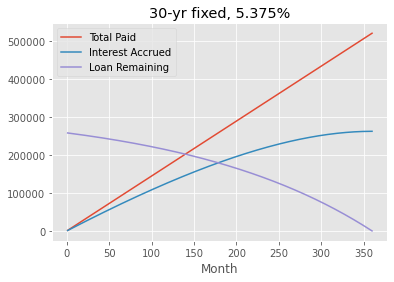

In [3]:
rate = .05375
payment = 1448.03
amount_left = loan
amount_paid = 0
interest_accrued = 0
fixed_data = {'Month': [], 'Total Paid': [], 'Interest Accrued': [], 'Loan Remaining': []}

for year in range(30):
    for month in range(12):
        interest = amount_left * (rate / 12)
        amount_left += interest - payment

        amount_paid += payment
        interest_accrued += interest

        fixed_data['Month'].append(12*year + month+1)
        fixed_data['Total Paid'].append(amount_paid)
        fixed_data['Interest Accrued'].append(round(interest_accrued, 2))
        fixed_data['Loan Remaining'].append(round(amount_left, 2))
    # print(f'  {year+1}-{month+1}\t\t${amount_paid}\t\t${round(interest_accrued, 2)}\t${round(amount_left, 2)}')

dfs['Fixed'] = pd.DataFrame(data=fixed_data)
dfs['Fixed'].plot(x="Month", title='30-yr fixed, 5.375%')
print(f"Total Paid: ${fixed_data['Total Paid'][-1]}")
print(f"Total Interest: ${fixed_data['Interest Accrued'][-1]}")

### Scenario 2: 30-year 5/1 ARM - expected case

Total Paid: $393983.2
Total Interest: $127643.46


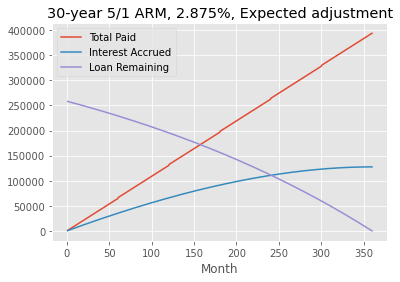

In [4]:
rate = .02875
payment = 1072.87
amount_left = loan
amount_paid = 0
interest_accrued = 0
arm51_data = {'Month': [], 'Total Paid': [], 'Interest Accrued': [], 'Loan Remaining': []}

for year in range(30):
    for month in range(12):
        if year != 0 and year % 5 == 0 and month == 0:
            amount_paid += 1550

        interest = amount_left * (rate / 12)
        amount_left += interest - payment

        amount_paid += payment
        interest_accrued += interest

        arm51_data['Month'].append(12*year + month+1)
        arm51_data['Total Paid'].append(round(amount_paid, 2))
        arm51_data['Interest Accrued'].append(round(interest_accrued, 2))
        arm51_data['Loan Remaining'].append(round(amount_left, 2))

dfs['5/1 ARM Expected'] = pd.DataFrame(data=arm51_data)
dfs['5/1 ARM Expected'].plot(x="Month", title='30-year 5/1 ARM, 2.875%, Expected adjustment')
print(f"Total Paid: ${arm51_data['Total Paid'][-1]}")
print(f"Total Interest: ${arm51_data['Interest Accrued'][-1]}")

### Scenario 3: 30-year 5/1 ARM - worst case

Total Paid: $543022.6
Total Interest: $276684.22


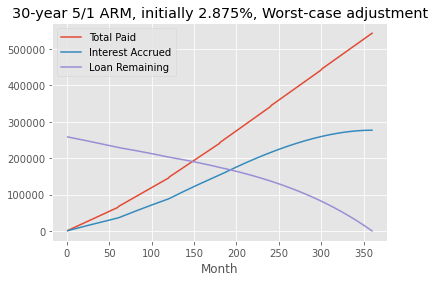

In [5]:
rate = .02875
payment = 1072.87
amount_left = loan
amount_paid = 0
interest_accrued = 0
arm52_data = {'Month': [], 'Total Paid': [], 'Interest Accrued': [], 'Loan Remaining': []}

for year in range(30):
    for month in range(12):
        if year != 0 and year % 5 == 0 and month == 0:
            amount_paid += 1550

        if year == 5 and month == 0:
            rate += .02
            payment = 1324.25
        if year == 10 and month == 0:
            rate += .02
            payment = 1556.93
        if year == 15 and month == 0:
            rate += .01
            payment = 1655.72

        interest = amount_left * (rate / 12)
        amount_left += interest - payment

        amount_paid += payment
        interest_accrued += interest

        arm52_data['Month'].append(12*year + month+1)
        arm52_data['Total Paid'].append(round(amount_paid, 2))
        arm52_data['Interest Accrued'].append(round(interest_accrued, 2))
        arm52_data['Loan Remaining'].append(round(amount_left, 2))

dfs['5/1 ARM Worst-case'] = pd.DataFrame(data=arm52_data)
dfs['5/1 ARM Worst-case'].plot(x="Month", title='30-year 5/1 ARM, initially 2.875%, Worst-case adjustment')
print(f"Total Paid: ${arm52_data['Total Paid'][-1]}")
print(f"Total Interest: ${arm52_data['Interest Accrued'][-1]}")

### Scenario 4: 30-year 7/1 ARM - expected case

Total Paid: $417759.2
Total Interest: $152967.08


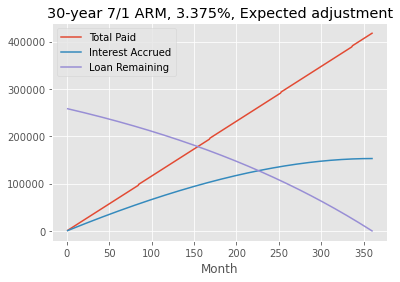

In [6]:
rate = .03375
payment = 1143.22
amount_left = loan
amount_paid = 0
interest_accrued = 0
arm71_data = {'Month': [], 'Total Paid': [], 'Interest Accrued': [], 'Loan Remaining': []}

for year in range(30):
    for month in range(12):
        if year != 0 and year % 7 == 0 and month == 0:
            amount_paid += 1550

        interest = amount_left * (rate / 12)
        amount_left += interest - payment

        amount_paid += payment
        interest_accrued += interest

        arm71_data['Month'].append(12*year + month+1)
        arm71_data['Total Paid'].append(round(amount_paid, 2))
        arm71_data['Interest Accrued'].append(round(interest_accrued, 2))
        arm71_data['Loan Remaining'].append(round(amount_left, 2))

dfs['7/1 ARM Expected'] = pd.DataFrame(data=arm71_data)
dfs['7/1 ARM Expected'].plot(x="Month", title='30-year 7/1 ARM, 3.375%, Expected adjustment')
print(f"Total Paid: ${arm71_data['Total Paid'][-1]}")
print(f"Total Interest: ${arm71_data['Interest Accrued'][-1]}")

### Scenario 5: 30-year 7/1 ARM - worst case

Total Paid: $529606.88
Total Interest: $264816.12


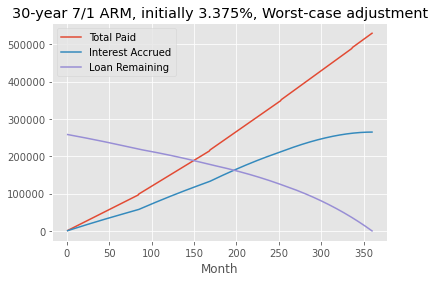

In [7]:
rate = .03375
payment = 1143.22
amount_left = loan
amount_paid = 0
interest_accrued = 0
arm72_data = {'Month': [], 'Total Paid': [], 'Interest Accrued': [], 'Loan Remaining': []}

for year in range(30):
    for month in range(12):
        if year != 0 and year % 7 == 0 and month == 0:
            amount_paid += 1550

        if year == 7 and month == 0:
            rate += .02
            payment = 1385.61
        if year == 14 and month == 0:
            rate += .02
            payment = 1583.45
        if year == 21 and month == 0:
            rate += .01
            payment = 1647.92

        interest = amount_left * (rate / 12)
        amount_left += interest - payment

        amount_paid += payment
        interest_accrued += interest

        arm72_data['Month'].append(12*year + month+1)
        arm72_data['Total Paid'].append(round(amount_paid, 2))
        arm72_data['Interest Accrued'].append(round(interest_accrued, 2))
        arm72_data['Loan Remaining'].append(round(amount_left, 2))

dfs['7/1 ARM Worst-case'] = pd.DataFrame(data=arm72_data)
dfs['7/1 ARM Worst-case'].plot(x="Month", title='30-year 7/1 ARM, initially 3.375%, Worst-case adjustment')
print(f"Total Paid: ${arm72_data['Total Paid'][-1]}")
print(f"Total Interest: ${arm72_data['Interest Accrued'][-1]}")

## Comparisons

In [8]:
for k, v in dfs.items():
    v.rename(columns={c: f'{k} {c}' for c in list(v.columns) if c != 'Month'}, inplace=True)

In [9]:
from functools import reduce
all_totals = reduce(lambda left, right: pd.merge(left, right, on=['Month'], how='outer'), dfs.values())

<AxesSubplot:title={'center':'Principal Balance'}, xlabel='Month'>

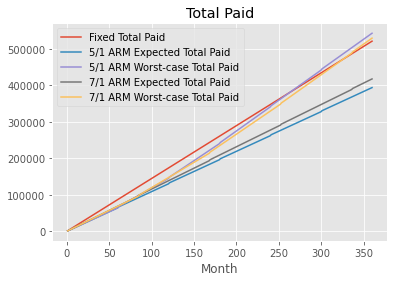

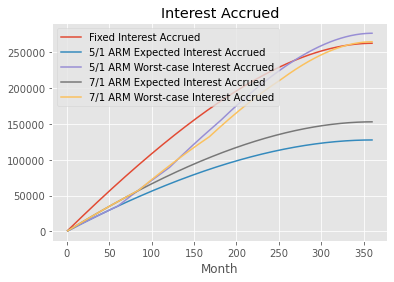

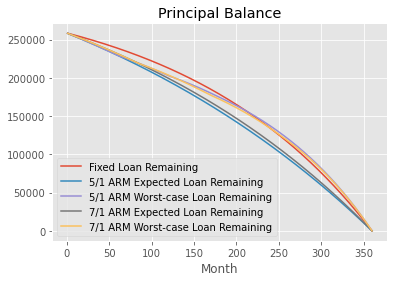

In [10]:
all_totals.plot(title='Total Paid', x='Month', y=[f'{k} Total Paid' for k in dfs])
all_totals.plot(title='Interest Accrued', x='Month', y=[f'{k} Interest Accrued' for k in dfs])
all_totals.plot(title='Principal Balance', x='Month', y=[f'{k} Loan Remaining' for k in dfs])